In [131]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rewards/rewards.csv
/kaggle/input/rewards48/rewards (4).csv
/kaggle/input/allrecipes/lunch.csv
/kaggle/input/allrecipes/dinner.csv
/kaggle/input/allrecipes/breakfast.csv
/kaggle/input/correct-rewards-normal/rewards (6).csv


In [132]:
breakfast = pd.read_csv('/kaggle/input/allrecipes/breakfast.csv')
lunch = pd.read_csv('/kaggle/input/allrecipes/lunch.csv')
dinner = pd.read_csv('/kaggle/input/allrecipes/dinner.csv')

In [133]:
breakfast = breakfast.drop(['Unnamed: 0'], axis = 1)
lunch = lunch.drop(['Unnamed: 0'], axis = 1)
dinner = dinner.drop(['Unnamed: 0'], axis = 1)

In [134]:
breakfast = breakfast.fillna(0)
lunch = lunch.fillna(0)
dinner = dinner.fillna(0)

In [135]:
breakfast.columns

Index(['RecipeID', 'Name', 'Ingredients', 'Servings Per Recipe', 'Calories',
       'Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat',
       'Cholesterol', 'Dietary Fiber', 'Sodium', 'Rating', 'Number of Ratings',
       'URL'],
      dtype='object')

In [136]:
l = [breakfast, lunch, dinner]
for data in l:
    for index in range (len(data)):
        cals = data.loc[index, 'Calories']
        factor = 1000/data.loc[index, 'Calories']
        data.loc[index, 'Calories'] = 1000
        columns = ['Servings Per Recipe','Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat','Cholesterol', 'Dietary Fiber', 'Sodium']
        for col in columns:
            if col == 'Servings Per Recipe':
                data.loc[index, col] = 1*(1000/cals)
            else:
                data.loc[index, col] = data.loc[index, col]*factor

/tmp/ipykernel_32/14826507.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.407407407407407' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, col] = 1*(1000/cals)
/tmp/ipykernel_32/14826507.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.62962962962963' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, col] = data.loc[index, col]*factor
/tmp/ipykernel_32/14826507.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.407407407407407' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, col] = data.loc[index, col]*factor
/tmp/ipykernel_32/14826507.py:12: FutureWarning:

In [138]:
breakfast

,RecipeID,Name,Ingredients,Servings Per Recipe,Calories,Protein,Total Carbohydrate,Total Fat,Saturated Fat,Cholesterol,Dietary Fiber,Sodium,Rating,Number of Ratings,URL
0,1,Brennan's Irish Soda Bread,1 cup milk 2 tablespoons distilled white vineg...,7.407407,1000,29.629630,200.000000,7.407407,0.000000,14.814815,7.407407,1755.555556,4.8,334,https://www.allrecipes.com/recipe/213830/brenn...
1,2,Mini Sausage Pancake Muffins,1 pound pork sausage 2 cups pancake mix 1 1/4 ...,9.803922,1000,49.019608,78.431373,58.823529,19.607843,166.666667,0.000000,2254.901961,4.5,4,https://www.allrecipes.com/mini-sausage-pancak...
2,3,Cinnamon Bread,2 cups all-purpose flour 1 cup white sugar 1 c...,4.587156,1000,18.348624,165.137615,27.522936,4.587156,146.788991,4.587156,1692.660550,4.6,1153,https://www.allrecipes.com/recipe/6934/cinnamo...
3,4,Conchas (Mexican Sweet Bread),½ cup warm water 2 ½ teaspoons yeast 4 cups al...,2.531646,1000,17.721519,149.367089,37.974684,22.784810,131.645570,5.063291,767.088608,4.5,250,https://www.allrecipes.com/recipe/88907/concha...
4,5,Pan de Muertos (Mexican Bread of the Dead),¼ cup milk ¼ cup butter or margarine ¼ cup war...,4.807692,1000,24.038462,173.076923,24.038462,4.807692,149.038462,4.807692,500.000000,4.6,161,https://www.allrecipes.com/recipe/7224/pan-de-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1128,Summer Fruit Salad with Mint Dressing,4 cups cubed seeded watermelon 2 cups sliced f...,10.101010,1000,20.202020,252.525253,10.101010,0.000000,0.000000,30.303030,30.303030,4.9,26,https://www.allrecipes.com/recipe/228231/summe...
1093,1129,Whole Wheat Blueberry Pancakes,1 ¼ cups whole wheat flour 2 teaspoons baking ...,6.250000,1000,62.500000,168.750000,18.750000,6.250000,256.250000,25.000000,2900.000000,4.4,774,https://www.allrecipes.com/recipe/104894/whole...
1094,1130,Chocolate Banana Smoothie,1 banana 1 tablespoon chocolate syrup 1 cup m...,3.571429,1000,35.714286,182.142857,17.857143,10.714286,71.428571,14.285714,435.714286,4.2,162,https://www.allrecipes.com/recipe/32571/chocol...
1095,1131,Healthy Multigrain Chia Waffles,cooking spray 1 ¾ cups almond milk ½ cup uns...,6.802721,1000,34.013605,163.265306,27.210884,6.802721,156.462585,34.013605,2469.387755,4.9,70,https://www.allrecipes.com/recipe/239077/healt...


In [139]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def kmeans_elbow(data):
    nutritional_values = data[['Protein', 'Total Carbohydrate', 'Total Fat', 'Dietary Fiber']]
    scaler = StandardScaler()
    normalized_values = scaler.fit_transform(nutritional_values)

    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_values)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, 10), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    return normalized_values

In [140]:
def kmeans(normalized_values, data, num):
    kmeans = KMeans(n_clusters=num, random_state=42)
    clusters = kmeans.fit_predict(normalized_values)
    data['Cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

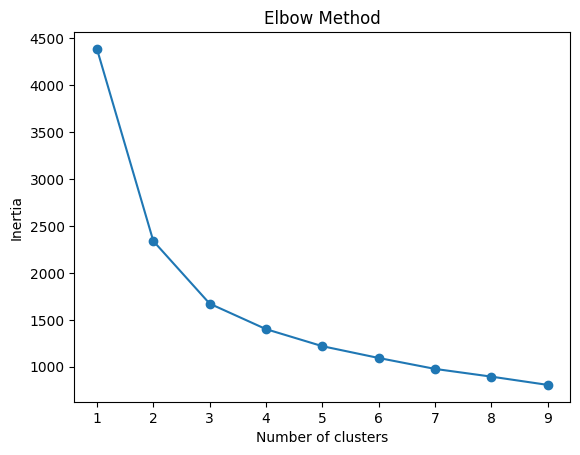

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

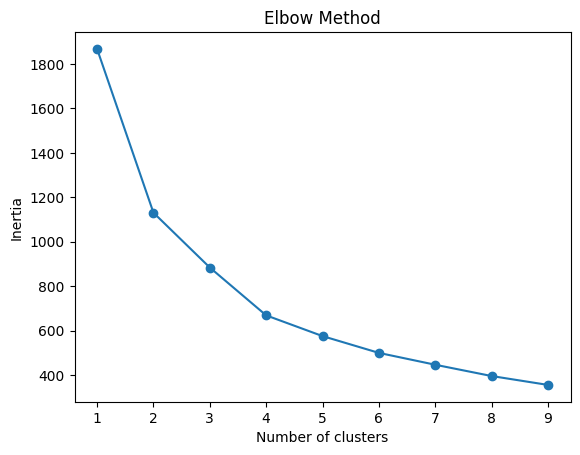

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

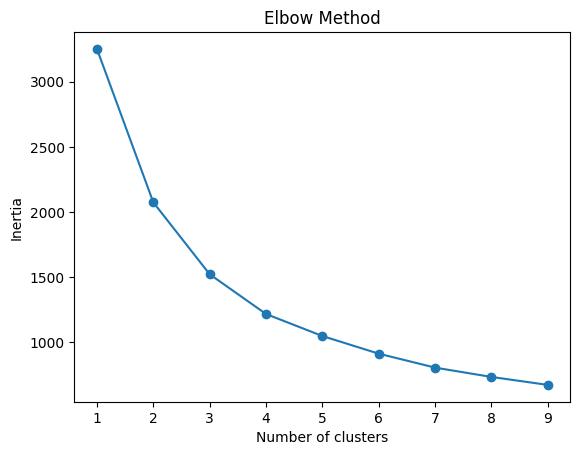

In [141]:
l = [breakfast, lunch, dinner]
normalized = []
for data in l:
    normalized_values = kmeans_elbow(data)
    normalized.append(normalized_values)

In [142]:
kmeans(normalized[0], breakfast, 3)
kmeans(normalized[1], lunch, 4)
kmeans(normalized[2], dinner, 3)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [143]:
import numpy as np
import pandas as pd

np.random.seed(42)
num_rows = 10000
person_id = np.arange(1, num_rows + 1)
gender = np.random.randint(0, 2, size=num_rows)
age = np.random.randint(18, 80, size=num_rows)
height = np.random.randint(150, 195, size=num_rows)

bmi_mean = 22
bmi_std = 2
bmi = np.random.normal(bmi_mean, bmi_std, size=num_rows)
weight = np.round(bmi * (height / 100) ** 2) 
physical_activity_level = np.random.randint(0, 6, size=num_rows)
muscle = np.random.randint(0, 2, size=num_rows)
weightloss = np.random.randint(0, 2, size=num_rows)
hearthealthy = np.random.randint(0, 2, size=num_rows)

# Create DataFrame
data = {
    'personID': person_id,
    'gender': gender,
    'age': age,
    'height': height,
    'weight': weight,
    'physical_activity_level': physical_activity_level,
    'muscle': muscle,
    'weightloss': weightloss,
    'hearthealthy' : hearthealthy
}

user_df = pd.DataFrame(data)
print(user_df)

      personID  gender  age  height  weight  physical_activity_level  muscle  \
0            1       0   68     166    53.0                        1       1   
1            2       1   57     158    58.0                        0       0   
2            3       0   24     184    65.0                        0       1   
3            4       0   49     178    69.0                        2       1   
4            5       0   65     188    66.0                        0       0   
...        ...     ...  ...     ...     ...                      ...     ...   
9995      9996       1   33     189    87.0                        2       0   
9996      9997       0   77     189    74.0                        3       0   
9997      9998       1   71     179    61.0                        5       0   
9998      9999       1   33     157    55.0                        4       1   
9999     10000       0   52     151    52.0                        5       0   

      weightloss  hearthealthy  
0     

In [144]:
user_df.columns

Index(['personID', 'gender', 'age', 'height', 'weight',
       'physical_activity_level', 'muscle', 'weightloss', 'hearthealthy'],
      dtype='object')

In [145]:
def men_bmr(height, weight, age):
    return 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
def women_bmr(height, weight, age):
    return 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
def nutrient_count(row):
    height = row['height']
    weight = row['weight']
    gender = row['gender']
    age = row['age']
    activity_level = row['physical_activity_level']
    if (gender == 1):
        bmr = men_bmr(height, weight, age)
    else:
        bmr = women_bmr(height, weight, age)
    cal_factor = {0: 1.2, 1:1.375, 2:1.465, 3:1.55, 4:1.725, 5:1.9}
    protein_factor = {0: 0.8, 1:1, 2:1.2, 3: 1.4, 4:1.6, 5:1.8}
    calories = cal_factor[activity_level]*bmr
    protein = protein_factor[activity_level]*weight
    fiber = 0.014*calories
    carbohydrates = 0.45*calories/4
    fat = 0.2*calories/9
    return [bmr, calories, protein, fat, fiber, carbohydrates]

In [146]:
for i in [breakfast, lunch, dinner]:
    i.columns = ['RecipeID', 'Name', 'Ingredients', 'Servings Per Recipe', 'calories',
           'protein', 'carbohydrates', 'fat', 'saturated_fat',
           'cholesterol', 'fiber', 'Sodium', 'Rating', 'Number of Ratings',
           'URL', 'Cluster']

In [147]:
new_columns = ['bmr', 'calories', 'protein', 'fat', 'fiber', 'carbohydrates']  # Names of the new columns
for col in new_columns:
    user_df[col] = None
for index, row in user_df.iterrows():
    nutrient_list = nutrient_count(row)
    user_df.loc[index, 'bmr'] = nutrient_list[0]
    user_df.loc[index, 'calories'] = nutrient_list[1]
    user_df.loc[index, 'protein'] = nutrient_list[2]
    user_df.loc[index, 'fat'] = nutrient_list[3]
    user_df.loc[index, 'fiber'] = nutrient_list[4]
    user_df.loc[index, 'carbohydrates'] = nutrient_list[5]

In [148]:
user_df

,personID,gender,age,height,weight,physical_activity_level,muscle,weightloss,hearthealthy,bmr,calories,protein,fat,fiber,carbohydrates
0,1,0,68,166,53.0,1,1,0,1,1157.512,1591.579,53.0,35.368422,22.282106,179.052638
1,2,1,57,158,58.0,0,0,1,1,1300.041,1560.0492,46.4,34.66776,21.840689,175.505535
2,3,0,24,184,65.0,0,1,1,0,1514.76,1817.712,52.0,40.3936,25.447968,204.4926
3,4,0,49,178,69.0,2,1,1,0,1424.91,2087.49315,82.8,46.388737,29.224904,234.842979
4,5,0,65,188,66.0,0,0,1,0,1358.869,1630.6428,52.8,36.236507,22.828999,183.447315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,33,189,87.0,2,0,1,1,1973.571,2891.281515,104.4,64.2507,40.477941,325.26917
9996,9997,0,77,189,74.0,3,0,1,0,1383.983,2145.17365,103.6,47.670526,30.032431,241.332036
9997,9998,1,71,179,61.0,5,0,1,0,1361.533,2586.9127,109.8,57.486949,36.216778,291.027679
9998,9999,1,33,157,55.0,4,1,0,1,1391.299,2399.990775,88.0,53.333128,33.599871,269.998962


In [149]:
user_df.to_csv('user.csv')

In [150]:
breakfast_nutr = breakfast[['protein', 'fat', 'fiber', 'carbohydrates', 'saturated_fat',
       'cholesterol',  'Sodium', 'Cluster']]
lunch_nutr = lunch[['protein', 'fat', 'fiber', 'carbohydrates', 'saturated_fat',
       'cholesterol',  'Sodium', 'Cluster']]
dinner_nutr = dinner[['protein', 'fat', 'fiber', 'carbohydrates', 'saturated_fat',
       'cholesterol',  'Sodium', 'Cluster']]

In [151]:
def sample_recipe_from_cluster(cluster_id, recipes):
    cluster_indices = np.where(recipes['Cluster'] == cluster_id)[0]
    sampled_recipe_index = np.random.choice(cluster_indices)
    return recipes.iloc[sampled_recipe_index]

In [152]:
meals_means = []
meals = [breakfast_nutr, lunch_nutr, dinner_nutr]
for df in meals:
    df.columns = ['protein', 'fat', 'fiber', 'carbohydrates', 'saturated_fat','Cholesterol', 'Sodium', 'Cluster']
    cluster_means = df.groupby('Cluster').mean()
    cluster_variance = df.groupby('Cluster').var()
    meals_means.append(cluster_means)

In [40]:
meals_means[0]

,protein,fat,fiber,carbohydrates,saturated_fat,Cholesterol,Sodium
Cluster,,,,,,,
0,54.245347,68.518120,3.891874,46.073538,29.297569,534.837435,2270.913366
1,30.324718,19.590466,24.605135,188.863527,5.434444,38.034978,977.344722
2,28.902475,42.529087,7.466752,129.408015,17.428128,242.340256,1358.445402


In [153]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def cosine_sim(list1, list2):
    vector1 = np.array(list1).reshape(1, -1)
    vector2 = np.array(list2).reshape(1, -1)
    similarity = cosine_similarity(vector1, vector2)
    return similarity[0][0]

In [43]:
# already run and rewards saved
# rewards = []
# for i in range (10000):
#     u = [user_df.loc[i, 'protein'], user_df.loc[i, 'fat'], user_df.loc[i, 'fiber'], user_df.loc[i, 'carbohydrates']]
#     cals = user_df.loc[i, 'calories']
#     muscle = user_df.loc[i, 'muscle']
#     weightloss = user_df.loc[i, 'weightloss']
#     heart = user_df.loc[i, 'hearthealthy']
#     user_rewards_dict = {}
#     for i in range (0, 3):
#         b = sample_recipe_from_cluster(i, breakfast_nutr)
#         b_nutr = b[['protein', 'fat', 'fiber',
#        'carbohydrates']]*(cals/1000)*0.3
#         for j in range (0, 4):
#             l = sample_recipe_from_cluster(j, lunch_nutr)
#             l_nutr = l[['protein', 'fat', 'fiber',
#        'carbohydrates']]*(cals/1000)*0.4
#             for k in range (0, 3):
#                 d = sample_recipe_from_cluster(k, dinner_nutr)
#                 d_nutr = d[['protein', 'fat', 'fiber',
#        'carbohydrates']]*(cals/1000)*0.3
#                 sample = [x+y+z for x, y, z in zip(b_nutr, l_nutr, d_nutr)]
#                 x = cosine_sim(u, sample)
#                 if (muscle == 1):
#                     diff = (sample[0]-u[0])/u[0]
#                     x = x + 0.5*diff
#                 if (weightloss == 1):
#                     diff = (sample[3]-u[3])/u[3]
#                     x = x - 0.5*diff
#                 if (heart == 1):
#                     diff = (sample[1]-u[1])/u[1]
#                     x = x - 0.5*diff
#                 if (x > 1):
#                     x = 1
#                 if (x<0):
#                     x=0
#                 user_rewards_dict[(i, j, k)] = x
#     rewards.append(user_rewards_dict)

In [44]:
# rewards_df = pd.DataFrame(rewards)
# rewards_df.to_csv('rewards.csv')
# rewards_df

,"(0, 0, 0)","(0, 0, 1)","(0, 0, 2)","(0, 1, 0)","(0, 1, 1)","(0, 1, 2)","(0, 2, 0)","(0, 2, 1)","(0, 2, 2)","(0, 3, 0)",...,"(2, 0, 2)","(2, 1, 0)","(2, 1, 1)","(2, 1, 2)","(2, 2, 0)","(2, 2, 1)","(2, 2, 2)","(2, 3, 0)","(2, 3, 1)","(2, 3, 2)"
0,0.835199,0.557840,0.358004,0.046643,0.296029,0.000000,0.960872,0.551900,0.451923,0.472631,...,0.596943,0.651886,0.000000,0.000000,1.000000,0.828345,0.656901,1.000000,1.000000,1.000000
1,0.545029,0.609466,0.348340,0.000000,0.054926,0.000000,0.434613,0.394769,0.206405,0.042048,...,0.413065,0.421828,0.547918,0.273908,0.472701,0.423757,0.325730,0.686451,0.825423,0.567145
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.914032,0.945824,1.000000,1.000000,1.000000
3,1.000000,1.000000,0.963419,1.000000,1.000000,0.983713,1.000000,0.934148,1.000000,1.000000,...,0.799203,1.000000,0.712101,0.786885,0.896187,0.636998,0.779853,1.000000,0.854983,1.000000
4,0.974306,0.985010,0.985582,1.000000,1.000000,1.000000,1.000000,0.985262,1.000000,1.000000,...,0.864580,1.000000,1.000000,1.000000,0.860231,0.784445,0.784210,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.538650,0.438592,0.236177,0.367275,0.371677,0.242172,0.493035,0.517051,0.322454,0.437758,...,0.766016,0.618788,0.496484,0.336835,0.730045,0.613086,0.635702,0.523864,0.664047,0.379074
9996,0.875749,0.603778,0.802933,1.000000,1.000000,1.000000,1.000000,0.987667,1.000000,1.000000,...,0.779313,1.000000,0.941073,0.992407,0.931879,0.856508,0.999331,1.000000,0.919238,1.000000
9997,1.000000,0.928468,1.000000,1.000000,1.000000,0.990706,1.000000,0.848566,1.000000,0.943023,...,0.825521,1.000000,0.884520,1.000000,0.963974,0.790121,1.000000,1.000000,0.982607,1.000000
9998,1.000000,0.995334,0.595955,0.618899,0.773503,0.301467,1.000000,0.508460,0.287489,1.000000,...,0.727688,0.602109,0.634441,0.417431,0.809401,0.835715,0.580933,1.000000,0.918419,0.793168


In [154]:
rewards_df = pd.read_csv('/kaggle/input/final-rewards/final_rewards.csv')
rewards_df = rewards_df.drop(['Unnamed: 0'], axis=1)

In [155]:
new_columns = {col: str(i) for i, col in enumerate(rewards_df.columns, 0)}
rewards_df.rename(columns = new_columns, inplace=True)

In [156]:
rewards_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.835199,0.557840,0.358004,0.046643,0.296029,0.000000,0.960872,0.551900,0.451923,0.472631,...,0.596943,0.651886,0.000000,0.000000,1.000000,0.828345,0.656901,1.000000,1.000000,1.000000
1,0.545029,0.609466,0.348340,0.000000,0.054926,0.000000,0.434613,0.394769,0.206405,0.042048,...,0.413065,0.421828,0.547918,0.273908,0.472701,0.423757,0.325730,0.686451,0.825423,0.567145
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.914032,0.945824,1.000000,1.000000,1.000000
3,1.000000,1.000000,0.963419,1.000000,1.000000,0.983713,1.000000,0.934148,1.000000,1.000000,...,0.799203,1.000000,0.712101,0.786885,0.896187,0.636998,0.779853,1.000000,0.854983,1.000000
4,0.974306,0.985010,0.985582,1.000000,1.000000,1.000000,1.000000,0.985262,1.000000,1.000000,...,0.864580,1.000000,1.000000,1.000000,0.860231,0.784445,0.784210,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.538650,0.438592,0.236177,0.367275,0.371677,0.242172,0.493035,0.517051,0.322454,0.437758,...,0.766016,0.618788,0.496484,0.336835,0.730045,0.613086,0.635702,0.523864,0.664047,0.379074
9996,0.875749,0.603778,0.802933,1.000000,1.000000,1.000000,1.000000,0.987667,1.000000,1.000000,...,0.779313,1.000000,0.941073,0.992407,0.931879,0.856508,0.999331,1.000000,0.919238,1.000000
9997,1.000000,0.928468,1.000000,1.000000,1.000000,0.990706,1.000000,0.848566,1.000000,0.943023,...,0.825521,1.000000,0.884520,1.000000,0.963974,0.790121,1.000000,1.000000,0.982607,1.000000
9998,1.000000,0.995334,0.595955,0.618899,0.773503,0.301467,1.000000,0.508460,0.287489,1.000000,...,0.727688,0.602109,0.634441,0.417431,0.809401,0.835715,0.580933,1.000000,0.918419,0.793168


In [157]:
#function to check each arm is maximum for how many users
# def get_max_column(row):
#     return row.idxmax()
# def get_max_column_number(row):
#     return df.columns.get_loc(row)

# max_columns = rewards_df.apply(get_max_column, axis=1)
# check = {}
# for i in max_columns:
#     if (i not in check.keys()):
#         check[i] = 1;
#     else:
#         check[i] += 1

In [159]:
#function for checking average reward given by each arm
columns_mean = rewards_df.mean()
c = 0
for i in columns_mean:
    print(c, i)
    c+=1

0 0.8538314748125169
1 0.7837744161717476
2 0.7426977805912216
3 0.6172375180326337
4 0.5904477041609346
5 0.5073850986694374
6 0.8005544857190302
7 0.7254828227172253
8 0.6702139775450456
9 0.7645580013464714
10 0.75683304338253
11 0.657651860567822
12 0.9145500412434756
13 0.8124069573224341
14 0.8159915656650597
15 0.7908793945889496
16 0.7020203855240805
17 0.6554197649348907
18 0.8876146874444574
19 0.7664905574165649
20 0.7598249062862046
21 0.9062275657854271
22 0.8650402546199634
23 0.8211812124413749
24 0.8900126937238023
25 0.7854312600263723
26 0.7710400938645593
27 0.7109647665806383
28 0.6423788743933239
29 0.5765844550832904
30 0.8482979872660013
31 0.7274262057551647
32 0.7088469235963163
33 0.8519528650082749
34 0.8179516293001723
35 0.7505764438138914


In [160]:
cluster_combo_means = {}
count = 0
for i in range (0, 3):
    b_row = meals_means[0].iloc[i]
    b_row = b_row[['protein', 'fat', 'fiber',
       'carbohydrates','saturated_fat']]*0.3
    for j in range (0, 4):
        l_row = meals_means[1].iloc[j]
        l_row = l_row[['protein', 'fat', 'fiber',
       'carbohydrates','saturated_fat']]*0.4
        for k in range (0, 3):
            d_row = meals_means[2].iloc[k]
            d_row = d_row[['protein', 'fat', 'fiber',
       'carbohydrates','saturated_fat']]*0.3
            sum_nutr = [x+y+z for x, y, z in zip(b_row, l_row, d_row)]
            cluster_combo_means[count] = sum_nutr
            count += 1

In [202]:
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def make_context(user_df, cluster_combo_means, i, key):
    user_features = [user_df.loc[i, 'bmr'], user_df.loc[i, 'muscle'],  user_df.loc[i, 'weightloss'], user_df.loc[i, 'hearthealthy'], user_df.loc[i, 'physical_activity_level']]
    item_features = cluster_combo_means[key]
    user_features.extend(item_features)
    context = np.array(user_features)  
    if (np.dot(context.T, context)) > 1:
        context = context/np.dot(context.T, context)
    return context
    
def LinUCB(X, y, w, alpha):
    setl = set([])
    for i in range (0, 10000):
        p = {}
        for key, value in cluster_combo_means.items():
            context = make_context(user_df, cluster_combo_means, i, key)
            p_t_a = np.dot(w.T, context) + alpha*np.sqrt(np.dot(context.T, np.dot(np.linalg.inv(np.dot(X.T, X)), context)))
            p[key] = p_t_a
        chosen_arm = max(p, key=p.get)
        setl.add(chosen_arm)
        print("chosen_arm = ", chosen_arm)
        r = rewards_df.loc[i, str(chosen_arm)]
        context = make_context(user_df, cluster_combo_means, i, chosen_arm) 
        X = np.append(X, [context], axis=0)
        y = np.append(y, r)
        model = LinearRegression()
        model.fit(X, y)
        w = model.coef_
    return w, setl

def epsilon_greedy(X, y, w, epsilon):
    setl = set([])
    for i in range (0, 10000):
        random_number = np.random.random()
        if (random_number < epsilon):
            chosen_arm = random.randint(0,35)
            flag = 1
        else:
            p = {}
            for key, value in cluster_combo_means.items():
                context = make_context(user_df, cluster_combo_means, i, key) 
                p_t_a = np.dot(w.T, context)
                p[key] = p_t_a
            chosen_arm = max(p, key=p.get)
            flag = 0
        setl.add(chosen_arm)
        r = rewards_df.loc[i, str(chosen_arm)]
        context = make_context(user_df, cluster_combo_means, i, chosen_arm) 
        context = np.squeeze(context)
        X = np.append(X, [context], axis=0)
        y = np.append(y, r)
        model = LinearRegression()
        model.fit(X, y)
        w = model.coef_
        if (i > 9980):
            print(flag, chosen_arm)
    return w, setl

In [201]:
from sklearn.linear_model import LinearRegression
import random
max_column_names = rewards_df.idxmax(axis=1)
X = []
y = []
random_numbers = random.sample(range(0, 1001), 10)
for i in random_numbers:
    key = random.randint(0,35)
    context = make_context(user_df, cluster_combo_means, i, key)
    r = rewards_df.loc[i, str(key)]
    y.append(r)
    X.append(context)
X = np.array(X)
X = np.squeeze(X)
y = np.array(y)
model = LinearRegression()
model.fit(X, y)
w_initial = model.coef_
print(w_initial)

[  14449.19564195 -368813.26985506 -578883.31836817 -691786.32159981
   69536.50405881   -9717.07630856 -168614.81504087  -84533.77397599
   -1264.04917324  114646.28636798]


In [203]:
w, setl = epsilon_greedy(X, y, w_initial, 0.5)

0 12
1 33
0 12
0 12
0 12
0 12
0 12
1 4
1 0
1 11
1 5
1 21
1 0
1 18
0 12
1 31
0 12
1 17
1 12


In [192]:
w

array([-1.83658519e+02,  1.55509438e+05, -9.32485546e+04, -3.72363155e+05,
       -1.63900244e+04,  9.16672161e+03, -2.62563842e+04, -5.34776040e+03,
        3.57282232e+03,  3.73422050e+04])

In [166]:
len(setl)

36

In [167]:
def make_new_user(gender, height, weight, age, activity, muscle, weightloss, hearthealthy, w):
    new_user = {}
    new_user['gender'] = gender
    new_user['height'] = height
    new_user['weight'] = weight
    new_user['age'] = age
    new_user['physical_activity_level'] = activity
    new_user['muscle'] = muscle
    new_user['weightloss'] = weightloss
    new_user['hearthealthy'] = hearthealthy
    nutrient_list = nutrient_count(new_user)
    new_user['bmr'] = nutrient_list[0]
    new_user['calories'] = nutrient_list[1]
    new_user['protein'] = nutrient_list[2]
    new_user['fat'] = nutrient_list[3]
    new_user['fiber'] = nutrient_list[4]
    new_user['carbohydrates'] = nutrient_list[5]
    new_user = pd.DataFrame([new_user])
    p = {}
    for key, value in cluster_combo_means.items():
        context = make_context(new_user, cluster_combo_means, 0, key)
        p_t_a = np.dot(w.T, context)
        p[key] = p_t_a
    chosen_arm = max(p, key=p.get)
    return new_user, chosen_arm

In [180]:
def get_menu(user, chosen_arm):
    c = 0
    indices = []
    for i in range (3):
        for j in range (4):
            for k in range (3):
                if (c == chosen_arm):
                    indices = [i, j ,k]
                    break
                c += 1
    breakfast_options = breakfast[breakfast['Cluster'] == indices[0]].sample(n=5)
    lunch_options = lunch[lunch['Cluster'] == indices[1]].sample(n=5)
    dinner_options = dinner[dinner['Cluster'] == indices[2]].sample(n=5)
    cols_to_scale = ['Servings Per Recipe', 'calories',
       'protein', 'carbohydrates', 'fat', 'saturated_fat', 'cholesterol',
       'fiber', 'Sodium',]
    for col in cols_to_scale:
        breakfast_options[col] = breakfast_options[col]*(user.loc[0, 'calories']/1000)*0.3
        lunch_options[col] = lunch_options[col]*(user.loc[0, 'calories']/1000)*0.4
        dinner_options[col] = dinner_options[col]*(user.loc[0, 'calories']/1000)*0.3
    return breakfast_options, lunch_options, dinner_options

In [172]:
#to check if the reward fucntion actually gives maximum reward for the arm chose (if not maxim at least one of the best rewards)
# y = {}
# count = 0
# i = 0
# u = [new_user.loc[i, 'protein'], new_user.loc[i, 'fat'], new_user.loc[i, 'fiber'], new_user.loc[i, 'carbohydrates'], new_user.loc[i, 'saturated_fat']]
# muscle = new_user.loc[i, 'muscle']
# weightloss = new_user.loc[i, 'weightloss']
# heart = new_user.loc[i, 'hearthealthy']
# cals = new_user.loc[i, 'calories']
# for i in range (0, 3):
#     b_row = meals_means[0].iloc[i]
#     b_row = b_row[['protein', 'fat', 'fiber',
#        'carbohydrates','saturated_fat']]*0.3*(cals/1000)
#     for j in range (0, 4):
#         l_row = meals_means[1].iloc[j]
#         l_row = l_row[['protein', 'fat', 'fiber',
#        'carbohydrates','saturated_fat']]*0.4*(cals/1000)
#         for k in range (0, 3):
#             d_row = meals_means[2].iloc[k]
#             d_row = d_row[['protein', 'fat', 'fiber',
#        'carbohydrates','saturated_fat']]*0.3*(cals/1000)
#             sample = [x+y+z for x, y, z in zip(b_row, l_row, d_row)]
#             x = cosine_sim(u, sample)
#             if (muscle == 1):
#                 diff = (sample[0]-u[0])/sample[0]
#                 x = x + 0.5*diff
#             if (weightloss == 1):
#                 diff = (sample[3]-u[3])/sample[3]
#                 x = x - 0.5*diff
#             if (heart == 1):
#                 diff = (sample[1]-u[1])/sample[1]
#                 print(diff)
#                 x = x - 0.5*diff
#             if (x > 1):
#                 x = 1
#             if (x < 0):
#                 x = 0
#             y[count] = x
#             count += 1

In [173]:
# sorted_dict_desc = dict(sorted(y.items(), key=lambda item: item[1], reverse=True))
# sorted_dict_desc

{0: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 15: 1,
 17: 1,
 18: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 27: 1,
 29: 1,
 30: 1,
 33: 1,
 34: 1,
 35: 1,
 1: 0.9855368327432776,
 28: 0.9778053398876121,
 7: 0.9751021285139893,
 26: 0.9586640944056881,
 32: 0.937930054924959,
 16: 0.9265304407976458,
 14: 0.9143198799430874,
 20: 0.8920352581132673,
 25: 0.830733272104791,
 13: 0.7953080479046427,
 31: 0.7847266051051984,
 19: 0.7486521690410377}